# <div style="color:white;display:inline-block;border-radius:5px;background-color:#FF7F50;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:80%;letter-spacing:0.5px;margin:0"><b> </b>Imports</p></div>

In [2]:

import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os



# <div style="color:white;display:inline-block;border-radius:5px;background-color:#FF7F50;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:80%;letter-spacing:0.5px;margin:0"><b> </b> Reading Image File</p></div>

In [3]:

image_BGR = cv2.imread('/home/kalema/Downloads/archive/ts/ts/00004.jpg')
# Showing image shape
print('Image shape:', image_BGR.shape)  # tuple of (800, 1360, 3)

# Getting spatial dimension of input image
h, w = image_BGR.shape[:2]  

# Showing height an width of image
print('Image height={0} and width={1}'.format(h, w))  # 800 1360

Image shape: (800, 1360, 3)
Image height=800 and width=1360


# <div style="color:white;display:inline-block;border-radius:5px;background-color:#FF7F50;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:80%;letter-spacing:0.5px;margin:0"><b> </b>Image Annotation</p></div>

In [4]:

def annotate_image_with_bounding_boxes(image_path, annotation_path):
    image_BGR = cv2.imread(image_path)
    h, w = image_BGR.shape[:2]

    with open(annotation_path) as f:
        lst = [line.rstrip() for line in f]

    for i in range(len(lst)):
        bb_current = lst[i].split()
        x_center, y_center = int(float(bb_current[1]) * w), int(float(bb_current[2]) * h)
        box_width, box_height = int(float(bb_current[3]) * w), int(float(bb_current[4]) * h)
        
        x_min = int(x_center - (box_width / 2))
        y_min = int(y_center - (box_height / 2))

        cv2.rectangle(image_BGR, (x_min, y_min), (x_min + box_width, y_min + box_height), [172 , 10, 127], 2)

        class_current = 'Class: {}'.format(bb_current[0])
        cv2.putText(image_BGR, class_current, (x_min, y_min - 5), cv2.FONT_HERSHEY_COMPLEX, 0.7, [172 , 10, 127], 2)

    return image_BGR


# <div style="color:white;display:inline-block;border-radius:5px;background-color:#FF7F50;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:80%;letter-spacing:0.5px;margin:0"><b> </b>Plotting Annotated Image</p></div>

In [11]:
%matplotlib inline
def plot_and_save_image(image_BGR, title):
    plt.rcParams['figure.figsize'] = (15, 15)

    fig = plt.figure()
    plt.imshow(cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

    fig.savefig('/home/kalema/Downloads/saved_image.png')


# <div style="color:white;display:inline-block;border-radius:5px;background-color:#FF7F50;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:80%;letter-spacing:0.5px;margin:0"><b> </b>Results</p></div>

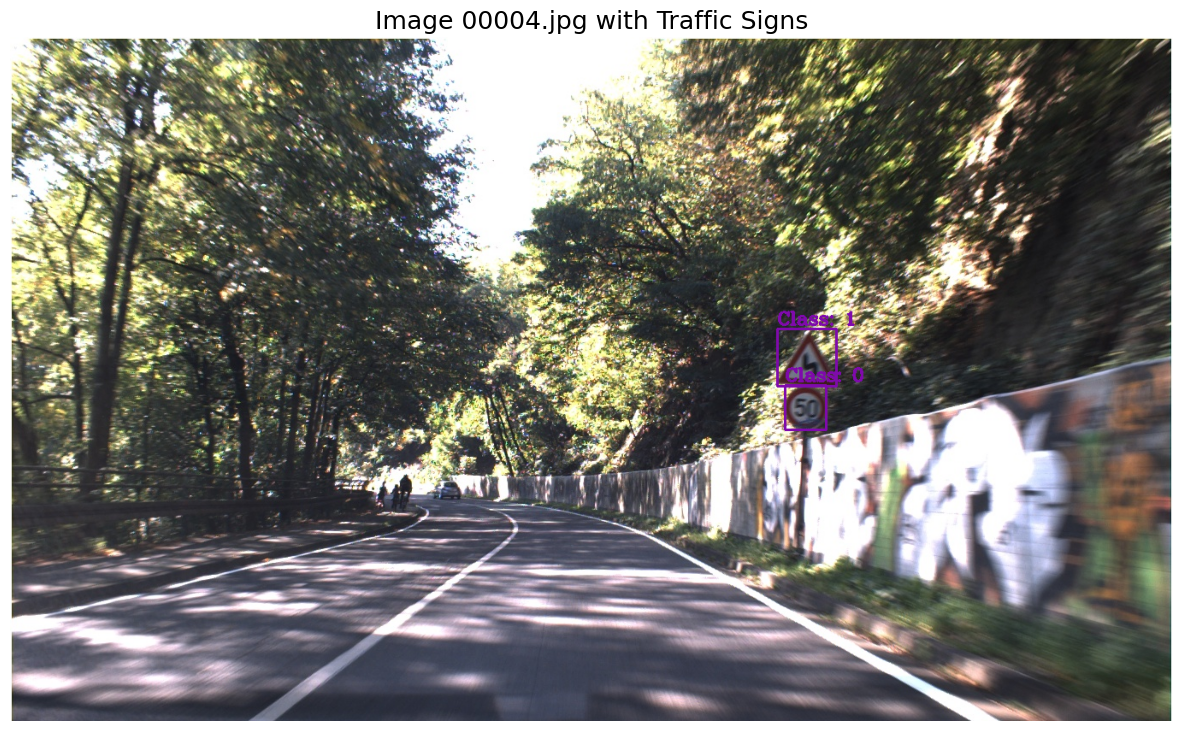

In [12]:
annotated_image = annotate_image_with_bounding_boxes('/home/kalema/Downloads/archive/ts/ts/00004.jpg', '/home/kalema/Downloads/archive/ts/ts/00004.txt')
plot_and_save_image(annotated_image, "Image 00004.jpg with Traffic Signs")

# annotated_image = annotate_image_with_bounding_boxes('/home/kalema/Downloads/archive/ts/ts/00003.jpg', '/home/kalema/Downloads/archive/ts/ts/00003.txt')
# plot_and_save_image(annotated_image, "Image 00003.jpg with Traffic Signs")

# annotated_image = annotate_image_with_bounding_boxes('/home/kalema/Downloads/archive/ts/ts/00005.jpg', '/home/kalema/Downloads/archive/ts/ts/00005.txt')
# plot_and_save_image(annotated_image, "Image 00005.jpg with Traffic Signs")

# annotated_image = annotate_image_with_bounding_boxes('/home/kalema/Downloads/archive/ts/ts/00006.jpg', '/home/kalema/Downloads/archive/ts/ts/00006.txt')
# plot_and_save_image(annotated_image, "Image 00006.jpg with Traffic Signs")

# annotated_image = annotate_image_with_bounding_boxes('/home/kalema/Downloads/archive/ts/ts/00007.jpg', '/home/kalema/Downloads/archive/ts/ts/00007.txt')
# plot_and_save_image(annotated_image, "Image 00007.jpg with Traffic Signs")

# annotated_image = annotate_image_with_bounding_boxes('/home/kalema/Downloads/archive/ts/ts/00008.jpg', '/home/kalema/Downloads/archive/ts/ts/00008.txt')
# plot_and_save_image(annotated_image, "Image 00008.jpg with Traffic Signs")

# annotated_image = annotate_image_with_bounding_boxes('/home/kalema/Downloads/archive/ts/ts/00009.jpg', '/home/kalema/Downloads/archive/ts/ts/00009.txt')
# plot_and_save_image(annotated_image, "Image 00009.jpg with Traffic Signs")
